Importing Necessary Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

2024-07-16 12:38:14.857331: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-16 12:38:14.857482: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-16 12:38:15.011000: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Loading the Trained Model

In [7]:
# Load the trained model
model = tf.keras.models.load_model('/kaggle/input/plant_disease_model.h5/tflite/plant-detection-v2/1/plant_disease_model.h5')


Defining the List of Disease Classes

In [8]:
# List of disease classes
disease_classes = [
    "Apple___Apple_scab",
    "Apple___Black_rot",
    "Apple___Cedar_apple_rust",
    "Apple___healthy",
    "Blueberry___healthy",
    "Cherry_(including_sour)___Powdery_mildew",
    "Cherry_(including_sour)___healthy",
    "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot",
    "Corn_(maize)___Common_rust_",
    "Corn_(maize)___Northern_Leaf_Blight",
    "Corn_(maize)___healthy",
    "Grape___Black_rot",
    "Grape___Esca_(Black_Measles)",
    "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",
    "Grape___healthy",
    "Orange___Haunglongbing_(Citrus_greening)",
    "Peach___Bacterial_spot",
    "Peach___healthy",
    "Pepper,_bell___Bacterial_spot",
    "Pepper,_bell___healthy",
    "Potato___Early_blight",
    "Potato___Late_blight",
    "Potato___healthy",
    "Raspberry___healthy",
    "Soybean___healthy",
    "Squash___Powdery_mildew",
    "Strawberry___Leaf_scorch",
    "Strawberry___healthy",
    "Tomato___Bacterial_spot",
    "Tomato___Early_blight",
    "Tomato___Late_blight",
    "Tomato___Leaf_Mold",
    "Tomato___Septoria_leaf_spot",
    "Tomato___Spider_mites Two-spotted_spider_mite",
    "Tomato___Target_Spot",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_mosaic_virus",
    "Tomato___healthy"
]

Preprocessing the Image

In [9]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Resize the image to 150x150 pixels
    img_array = image.img_to_array(img)  # Convert the image to an array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to fit the model input
    img_array = img_array / 255.0  # Normalize the image array
    return img_array


Predicting the Disease Name

In [10]:
def predict_disease_name(img_path):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)  # Make predictions
    predicted_class = np.argmax(predictions[0])  # Get the index of the class with the highest probability
    disease_name = disease_classes[predicted_class]  # Map the index to the disease name
    return disease_name

Example of test

In [12]:
# Example usage
img_path = '/kaggle/input/new-plant-diseases-dataset/test/test/PotatoEarlyBlight1.JPG'
predicted_disease_name = predict_disease_name(img_path)
print(f'Predicted disease: {predicted_disease_name}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
Predicted disease: Potato___Early_blight


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


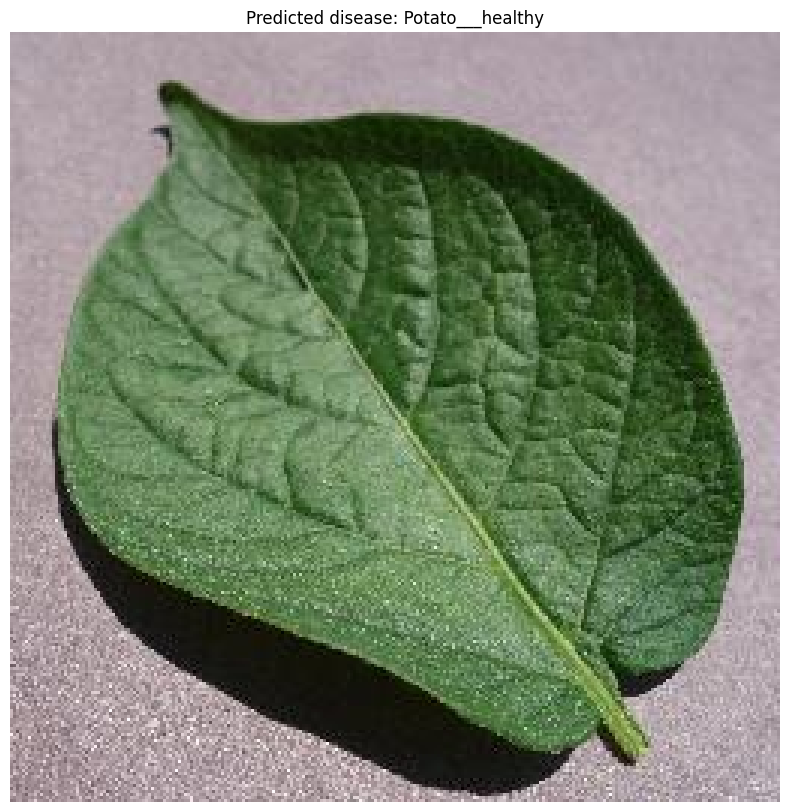

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('/kaggle/input/plant_disease_model.h5/tflite/plant-detection-v2/1/plant_disease_model.h5')

# List of disease classes
disease_classes = [
    "Apple___Apple_scab", "Apple___Black_rot", "Apple___Cedar_apple_rust", "Apple___healthy",
    "Blueberry___healthy", "Cherry_(including_sour)___Powdery_mildew", "Cherry_(including_sour)___healthy",
    "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot", "Corn_(maize)___Common_rust_", "Corn_(maize)___Northern_Leaf_Blight",
    "Corn_(maize)___healthy", "Grape___Black_rot", "Grape___Esca_(Black_Measles)", "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",
    "Grape___healthy", "Orange___Haunglongbing_(Citrus_greening)", "Peach___Bacterial_spot", "Peach___healthy",
    "Pepper,_bell___Bacterial_spot", "Pepper,_bell___healthy", "Potato___Early_blight", "Potato___Late_blight", "Potato___healthy",
    "Raspberry___healthy", "Soybean___healthy", "Squash___Powdery_mildew", "Strawberry___Leaf_scorch", "Strawberry___healthy",
    "Tomato___Bacterial_spot", "Tomato___Early_blight", "Tomato___Late_blight", "Tomato___Leaf_Mold", "Tomato___Septoria_leaf_spot",
    "Tomato___Spider_mites Two-spotted_spider_mite", "Tomato___Target_Spot", "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_mosaic_virus", "Tomato___healthy"
]

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Resize the image to 150x150 pixels
    img_array = image.img_to_array(img)  # Convert the image to an array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to fit the model input
    img_array = img_array / 255.0  # Normalize the image array
    return img_array

def predict_disease_name(img_path):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)  # Make predictions
    predicted_class = np.argmax(predictions[0])  # Get the index of the class with the highest probability
    disease_name = disease_classes[predicted_class]  # Map the index to the disease name
    return disease_name

def display_image_with_title(img_path, disease_name):
    # Load the image using OpenCV
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    # Display the image using matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted disease: {disease_name}')
    plt.show()

# Example usage
img_path = '/kaggle/input/new-plant-diseases-dataset/test/test/PotatoHealthy1.JPG'
predicted_disease_name = predict_disease_name(img_path)
display_image_with_title(img_path, predicted_disease_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


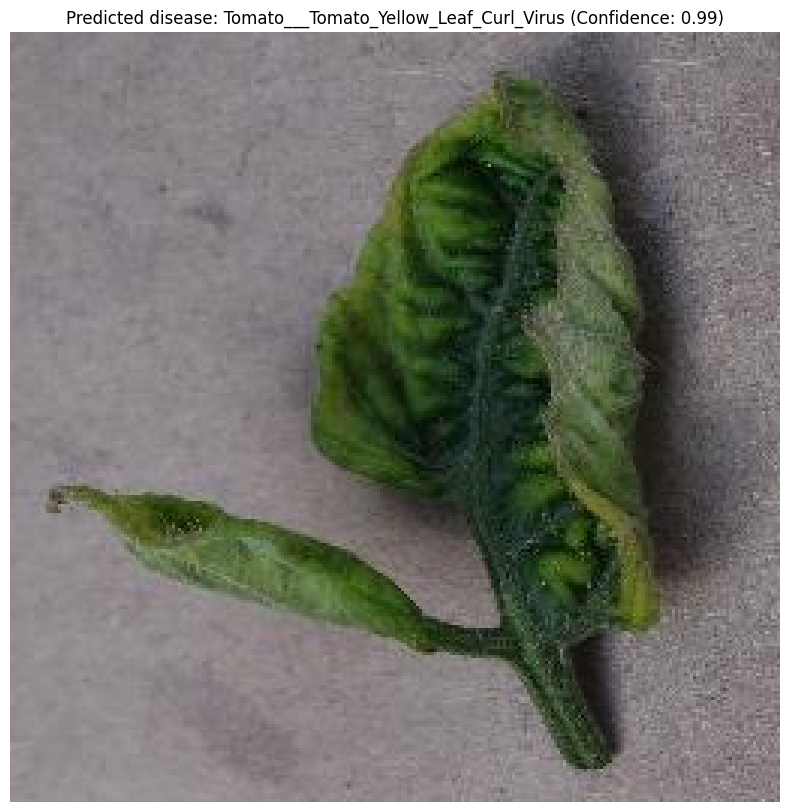

In [34]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

# Load the trained model
model = tf.keras.models.load_model('/kaggle/input/plant_disease_model.h5/tflite/plant-detection-v2/1/plant_disease_model.h5')

# List of disease classes
disease_classes = [
    "Apple___Apple_scab", "Apple___Black_rot", "Apple___Cedar_apple_rust", "Apple___healthy",
    "Blueberry___healthy", "Cherry_(including_sour)___Powdery_mildew", "Cherry_(including_sour)___healthy",
    "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot", "Corn_(maize)___Common_rust_", "Corn_(maize)___Northern_Leaf_Blight",
    "Corn_(maize)___healthy", "Grape___Black_rot", "Grape___Esca_(Black_Measles)", "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",
    "Grape___healthy", "Orange___Haunglongbing_(Citrus_greening)", "Peach___Bacterial_spot", "Peach___healthy",
    "Pepper,_bell___Bacterial_spot", "Pepper,_bell___healthy", "Potato___Early_blight", "Potato___Late_blight", "Potato___healthy",
    "Raspberry___healthy", "Soybean___healthy", "Squash___Powdery_mildew", "Strawberry___Leaf_scorch", "Strawberry___healthy",
    "Tomato___Bacterial_spot", "Tomato___Early_blight", "Tomato___Late_blight", "Tomato___Leaf_Mold", "Tomato___Septoria_leaf_spot",
    "Tomato___Spider_mites Two-spotted_spider_mite", "Tomato___Target_Spot", "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_mosaic_virus", "Tomato___healthy"
]

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Resize the image to 150x150 pixels
    img_array = image.img_to_array(img)  # Convert the image to an array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to fit the model input
    img_array = img_array / 255.0  # Normalize the image array
    return img_array

def predict_disease_and_confidence(img_path):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)  # Make predictions
    predicted_class = np.argmax(predictions[0])  # Get the index of the class with the highest probability
    confidence = np.max(predictions[0])  # Get the highest probability
    disease_name = disease_classes[predicted_class]  # Map the index to the disease name
    return disease_name, confidence

def display_image_with_title(img_path, disease_name, confidence):
    # Load the image using OpenCV
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    # Display the image using matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted disease: {disease_name} (Confidence: {confidence:.2f})')
    plt.show()

def calculate_accuracy(test_dir):
    correct_predictions = 0
    total_predictions = 0

    for class_name in os.listdir(test_dir):
        class_dir = os.path.join(test_dir, class_name)
        if not os.path.isdir(class_dir):
            continue
        
        print(f"Processing class: {class_name}")
        
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            print(f"Processing image: {img_path}")
            predicted_disease, _ = predict_disease_and_confidence(img_path)
            
            if predicted_disease == class_name:
                correct_predictions += 1
            total_predictions += 1
    
    if total_predictions == 0:
        print("No images found in the test directory.")
        return 0.0

    accuracy = correct_predictions / total_predictions
    return accuracy

# Example usage
img_path = '/kaggle/input/new-plant-diseases-dataset/test/test/TomatoYellowCurlVirus3.JPG'
predicted_disease_name, confidence = predict_disease_and_confidence(img_path)
display_image_with_title(img_path, predicted_disease_name, confidence)

